<a href="https://colab.research.google.com/github/baqt-code/1RF21IS048/blob/main/KNN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

In [2]:
iris = load_iris()
X = iris.data
y = iris.target

In [3]:
df = pd.DataFrame(data=X, columns=["SepalLengthCm", "SepalWidthCm", "PetalLengthCm", "PetalWidthCm"])
df["Species"] = y

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   SepalLengthCm  150 non-null    float64
 1   SepalWidthCm   150 non-null    float64
 2   PetalLengthCm  150 non-null    float64
 3   PetalWidthCm   150 non-null    float64
 4   Species        150 non-null    int64  
dtypes: float64(4), int64(1)
memory usage: 6.0 KB


In [5]:
X = df.drop("Species", axis=1)
y = df["Species"]

In [6]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

In [7]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [8]:
k_values = np.arange(1, 21)
mean_accuracy = []
for k in k_values:
    knn = KNeighborsClassifier(n_neighbors=k)
    scores = cross_val_score(knn, X_train_scaled, y_train, cv=5)
    mean_accuracy.append(scores.mean())

NameError: name 'cross_val_score' is not defined

In [9]:
!pip install scikit-learn
import numpy as np
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import cross_val_score

k_values = np.arange(1, 21)
mean_accuracy = []
for k in k_values:
    knn = KNeighborsClassifier(n_neighbors=k)
    scores = cross_val_score(knn, X_train_scaled, y_train, cv=5)
    mean_accuracy.append(scores.mean())

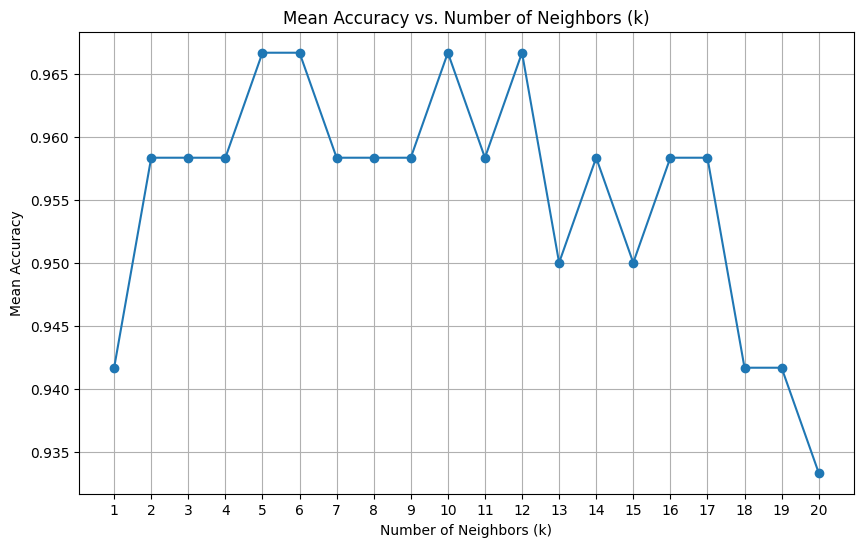

In [10]:
plt.figure(figsize=(10, 6))
plt.plot(k_values, mean_accuracy, marker='o', linestyle='-')
plt.title('Mean Accuracy vs. Number of Neighbors (k)')
plt.xlabel('Number of Neighbors (k)')
plt.ylabel('Mean Accuracy')
plt.xticks(k_values)
plt.grid(True)
plt.show()

In [11]:
best_k = k_values[np.argmax(mean_accuracy)]
print("Best k value:", best_k)

Best k value: 5


In [12]:
best_knn = KNeighborsClassifier(n_neighbors=best_k)
best_knn.fit(X_train_scaled, y_train)

KNeighborsClassifier()

In [13]:
y_score = best_knn.predict_proba(X_test_scaled)
fpr = dict()
tpr = dict()
roc_auc = dict()
for i in range(len(iris.target_names)):
    fpr[i], tpr[i], _ = roc_curve(y_test, y_score[:, i], pos_label=i)
    roc_auc[i] = auc(fpr[i], tpr[i])

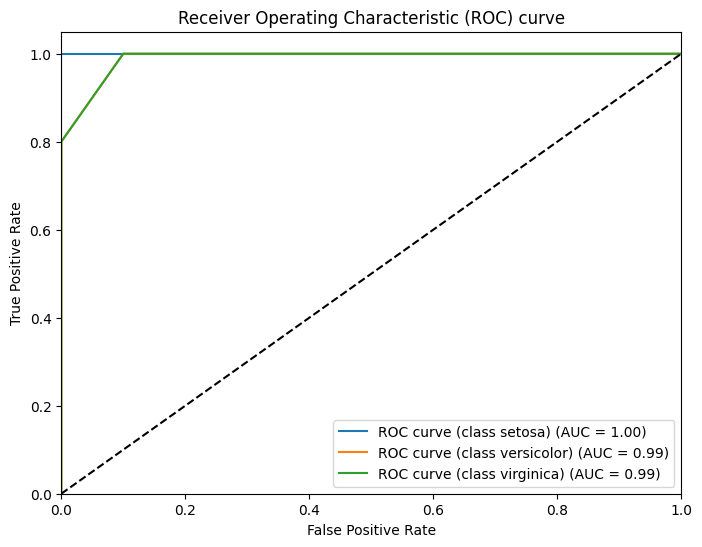

In [14]:
plt.figure(figsize=(8, 6))
for i in range(len(iris.target_names)):
    plt.plot(fpr[i], tpr[i], label=f'ROC curve (class {iris.target_names[i]}) (AUC = {roc_auc[i]:.2f})')

plt.plot([0, 1], [0, 1], 'k--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) curve')
plt.legend(loc="lower right")
plt.show()


In [15]:
y_pred = best_knn.predict(X_test_scaled)
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

NameError: name 'accuracy_score' is not defined

In [16]:
from sklearn.metrics import accuracy_score

In [17]:
y_pred = best_knn.predict(X_test_scaled)
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

Accuracy: 0.9333333333333333


In [18]:
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(8, 6))
plt.imshow(cm, interpolation='nearest', cmap=plt.cm.Blues)
plt.title('Confusion Matrix')
plt.colorbar()
tick_marks = np.arange(len(iris.target_names))
plt.xticks(tick_marks, iris.target_names)
plt.yticks(tick_marks, iris.target_names)
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.tight_layout()
for x in range(len(iris.target_names)):
    for y in range(len(iris.target_names)):
        plt.annotate(str(cm[x][y]), xy=(y, x), horizontalalignment='center', verticalalignment='center')
plt.show()


NameError: name 'confusion_matrix' is not defined

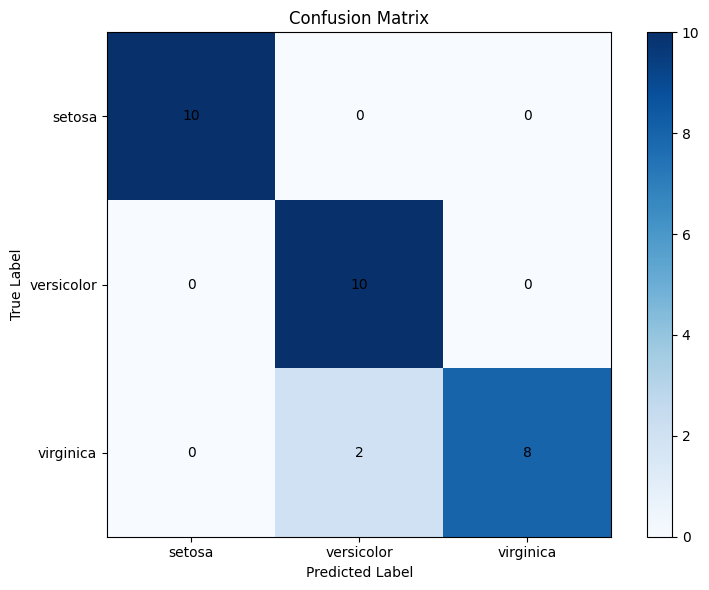

In [19]:
!pip install scikit-learn
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(8, 6))
plt.imshow(cm, interpolation='nearest', cmap=plt.cm.Blues)
plt.title('Confusion Matrix')
plt.colorbar()
tick_marks = np.arange(len(iris.target_names))
plt.xticks(tick_marks, iris.target_names)
plt.yticks(tick_marks, iris.target_names)
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.tight_layout()
for x in range(len(iris.target_names)):
    for y in range(len(iris.target_names)):
        plt.annotate(str(cm[x][y]), xy=(y, x), horizontalalignment='center', verticalalignment='center')
plt.show()